# Make table stats

In [8]:
import numpy as np
from astropy.table import Table, join
from matplotlib import pyplot as plt

In [2]:
import matplotlib.backends.backend_pdf

In [3]:
blindtable = 'spectro_Backgroundruns.csv'
semiblindtable = 'psdlc_Backgroundruns.csv'

In [10]:
idstr = 'spectro_Backgroundruns'
ocstd = 'final_oc_std'
vals = ['w', 'stdgran2', 'nugran2', 'hosc', 'stdenv', 'numax']

#idstr = 'psdlc_Backgroundruns'

#idstr = 'psdlc_Backgroundruns_lc'
#ocstd = 'oc_std_lc'
#vals = ['w_lc', 'stdgran2_lc', 'nugran2_lc', 'hosc_lc', 'stdenv_lc', 'numax_lc']

#idstr = 'psdlc_Backgroundruns_psd'
#ocstd = 'oc_std_psd'
#vals = ['w_psd', 'stdgran2_psd', 'nugran2_psd', 'hosc_psd', 'stdenv_psd', 'numax_psd']


In [12]:
summarytable = Table.read(idstr + '.csv', format='ascii.tab')

In [4]:
fillvalue = -999

In [15]:
summarytable.columns

<TableColumns names=('star','initialnumax','w','upper_credlimit_w','lower_credlimit_w','error_w','stdgran2','upper_credlimit_stdgran2','lower_credlimit_stdgran2','error_stdgran2','nugran2','upper_credlimit_nugran2','lower_credlimit_nugran2','error_nugran2','hosc','upper_credlimit_hosc','lower_credlimit_hosc','error_hosc','numax','upper_credlimit_numax','lower_credlimit_numax','error_numax','stdenv','upper_credlimit_stdenv','lower_credlimit_stdenv','error_stdenv','final_oc_std','previous_finalnumax')>

In [222]:
with open(idstr + '_info.txt', "w") as fp:
    summarytable.info('stats', out=fp)

In [17]:
plot_labels = [
    r'W [ppm$^2$/$\mu$Hz]',
    r'$\sigma_{color}$ [ppm]',
    r'$\nu_{color}$ [$\mu$Hz]',
    r'$\sigma_{long}$ [ppm]',
    r'$\nu_{long}$ [$\mu$Hz]',
    r'$\sigma_{gran,1}$ [ppm]',
    r'$\nu_{gran,1}$ [$\mu$Hz]',
    r'$\sigma_{gran,2}$ [ppm]',
    r'$\nu_{gran,2}$ [$\mu$Hz]',
    r'$\sigma_{gran}^{org}$ [ppm]',
    r'$\nu_{gran}^{org}$ [$\mu$Hz]',
    r'H$_{osc}$ [ppm$^2$/$\mu$Hz]',
    r'$\nu_{max}$ [$\mu$Hz]',
    r'$\sigma_{env}$ [$\mu$Hz]'
]
vallabels = {
    'w': plot_labels[0],
    'stdgran2': plot_labels[9],
    'nugran2': plot_labels[10],
    'hosc': plot_labels[11],
    'stdenv': plot_labels[13],
    'numax': plot_labels[12],
    
    'w_lc': plot_labels[0] + ' LC',
    'stdgran2_lc': plot_labels[9]+ ' LC',
    'nugran2_lc': plot_labels[10]+ ' LC',
    'hosc_lc': plot_labels[11]+ ' LC',
    'stdenv_lc': plot_labels[13]+ ' LC',
    'numax_lc': plot_labels[12]+ ' LC',
    'w_psd': plot_labels[0]+ ' PSD',
    'stdgran2_psd': plot_labels[9]+ ' PSD',
    'nugran2_psd': plot_labels[10]+ ' PSD',
    'hosc_psd': plot_labels[11]+ ' PSD',
    'stdenv_psd': plot_labels[13]+ ' PSD',
    'numax_psd': plot_labels[12]+ ' PSD',
}             

In [16]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [17]:
def make_fracplot(fig, val, err, vallabel, errlabel,
                  mask=None,
                  cc=None, cclabel='oc_std', fraclines=False):
    h = 4.8
    l = 6.4
    plt.xlabel(vallabel)
    plt.ylabel(errlabel)
    if mask is None:
        mask = ~val.mask
    mask &= (val != fillvalue)
    if cc is not None:
        scatters = plt.scatter(val[mask], err[mask], c=cc[mask], s=2)
        colorbar(scatters)
    else:
        plt.scatter(val[mask], err[mask], s=2)
    xs = np.linspace(np.amin(val[mask]), np.amax(val[mask]), 10)

    if fraclines:
        offset = 0.2 * np.std(val[mask])
        plt.plot(xs, xs, '--')
        plt.text(xs[8]-offset, xs[8], '100%', rotation=l/h * 25)
        plt.plot(xs, 0.5 * xs, '--')
        plt.text(xs[8]-offset, 0.5* xs[8], '50%', rotation=0.5 * l/h * 25)

        
def make_distplot(fig, val, vallabel, mask=None):
    if mask is None:
        mask = ~val.mask
    mask &= (val != fillvalue)
    plt.xlabel(vallabel)
    plt.hist(val[mask], bins=100)

148


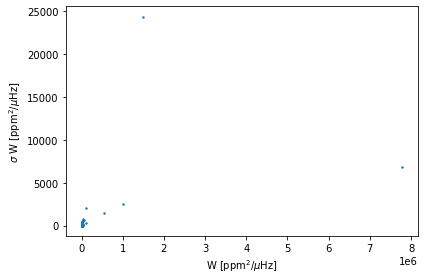

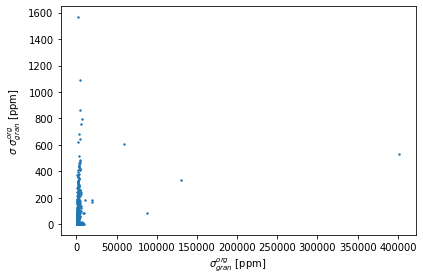

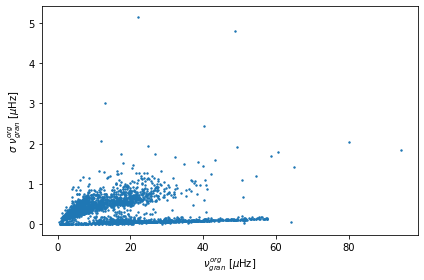

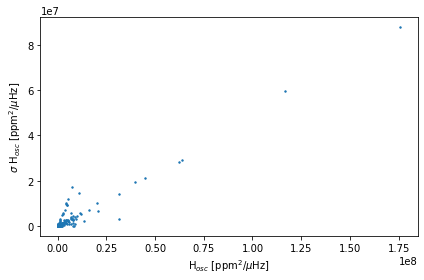

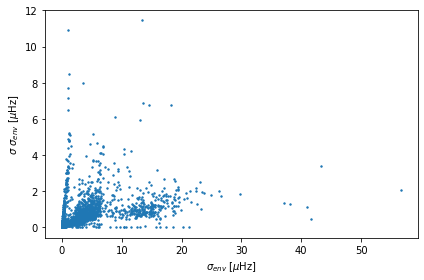

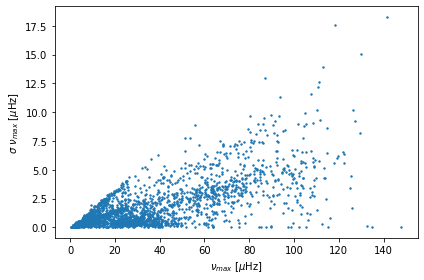

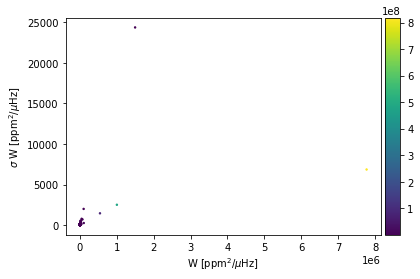

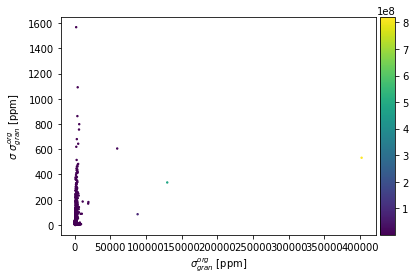

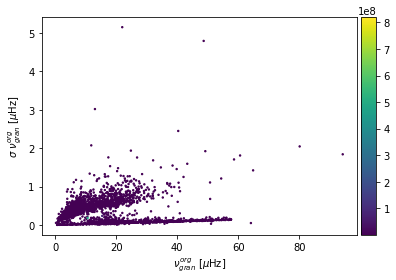

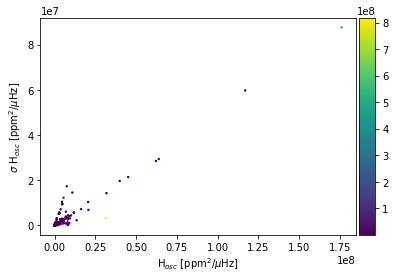

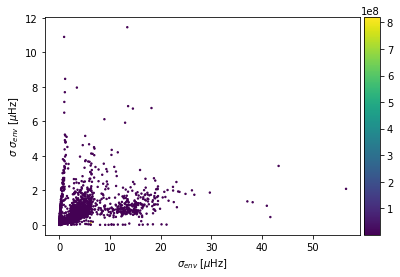

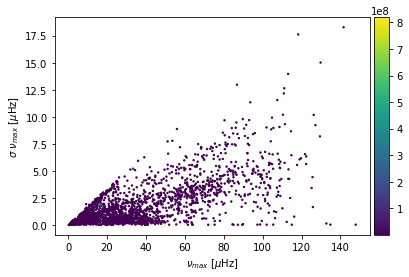

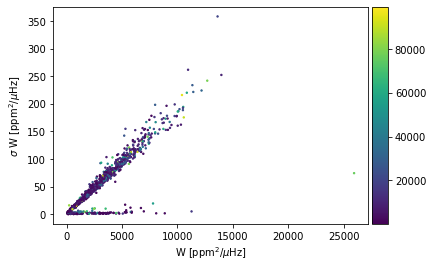

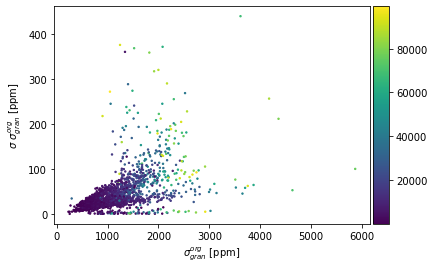

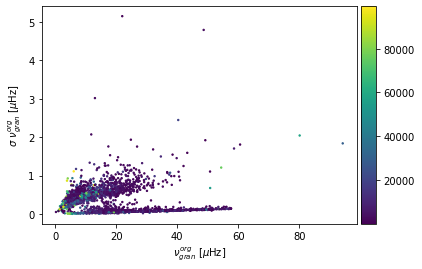

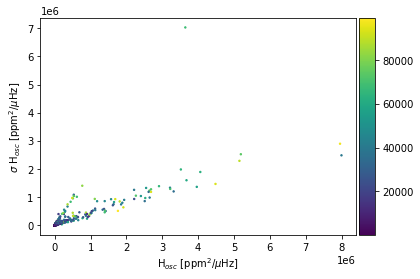

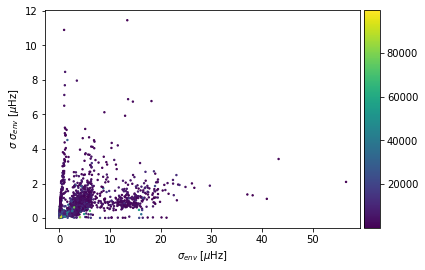

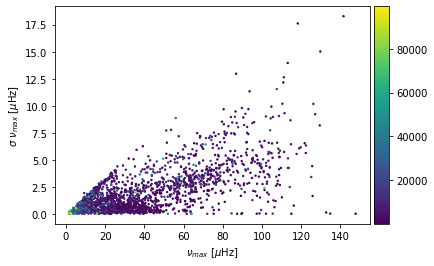

In [20]:

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_all.pdf')
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val], 
                  '$\sigma$ ' + vallabels[val])
    plt.tight_layout()
    pdf.savefig(fig)
pdf.close()

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_cc.pdf')
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val],
                  '$\sigma$ ' + vallabels[val],
                  cc=summarytable[ocstd])
    pdf.savefig(fig)
pdf.close()

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_ccmask.pdf')
mask = (summarytable[ocstd] < 1e5)
print(np.sum(~mask))
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val],
                  '$\sigma$ ' + vallabels[val],
                  cc=summarytable[ocstd],
                  mask=mask)
    pdf.savefig(fig)
pdf.close()

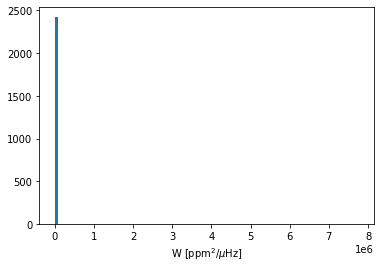

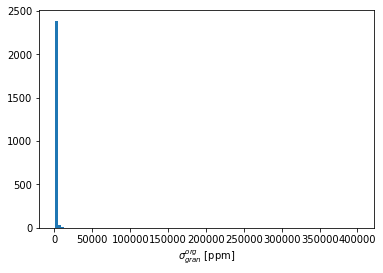

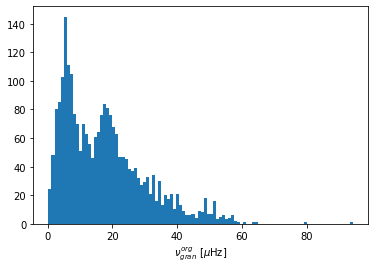

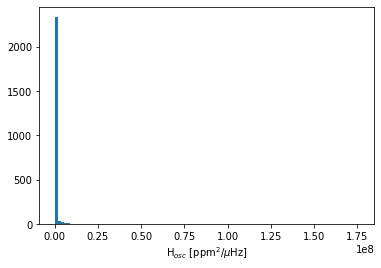

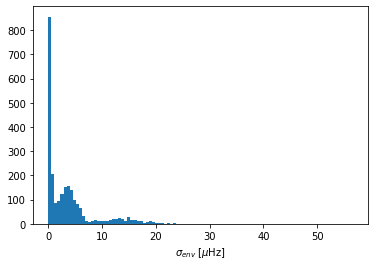

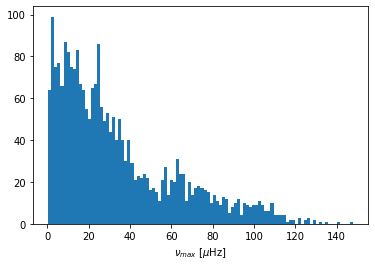

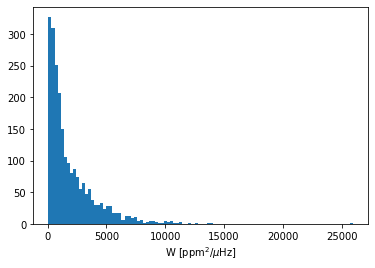

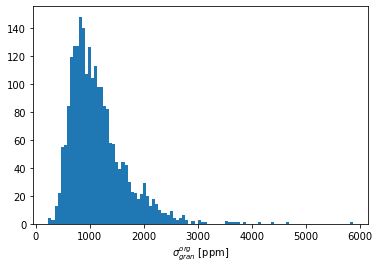

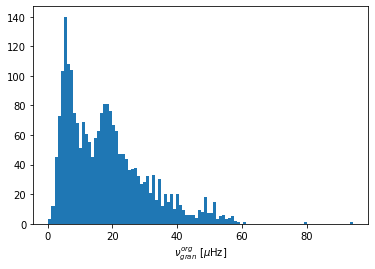

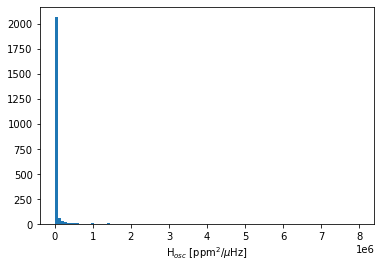

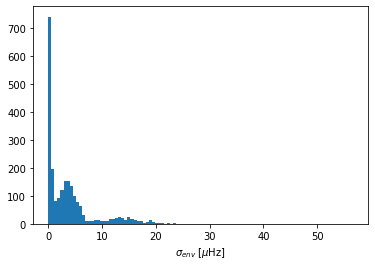

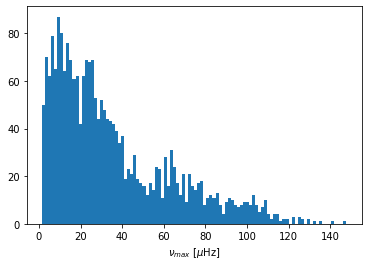

In [21]:
# Distibutions
pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_dists.pdf')
for val in vals:
    fig = plt.figure()
    make_distplot(fig,
                  summarytable[val],
                  vallabels[val])
    pdf.savefig(fig)
pdf.close()

# Distibutions
pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_distsmask.pdf')
mask = (summarytable[ocstd] < 1e5)
for val in vals:
    fig = plt.figure()
    make_distplot(fig,
                  summarytable[val],
                  vallabels[val], mask=mask)
    pdf.savefig(fig)
pdf.close()

# Compare the two

In [5]:
idstr = 'spectro_Backgroundruns'
idstr2 = 'psdlc_Backgroundruns'
spectro = Table.read(idstr + '.csv', format='ascii.tab')
psdlc = Table.read(idstr2 + '.csv', format='ascii.tab')

In [9]:
jointable = join(spectro, psdlc, keys='star')

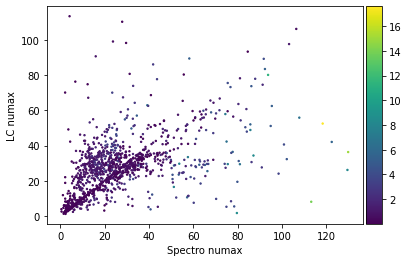

In [30]:
scatters = plt.scatter(jointable['numax'], jointable['numax_lc'], s=2, c=jointable['error_numax'])
plt.xlabel('Spectro numax')
plt.ylabel('LC numax')
colorbar(scatters)

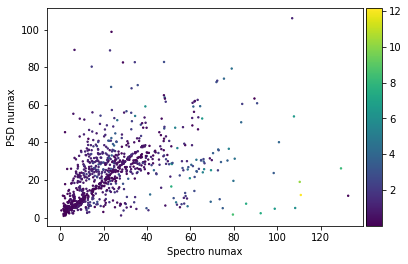

In [22]:
scatters = plt.scatter(jointable['numax'], jointable['numax_psd'], s=2, c=jointable['error_numax'])
plt.xlabel('Spectro numax')
plt.ylabel('PSD numax')
colorbar(scatters)

Text(0, 0.5, 'Uncertainty in PSD numax')

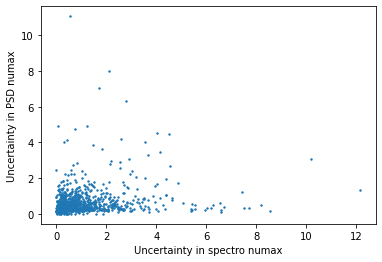

In [31]:
scatters = plt.scatter(jointable['error_numax'], jointable['error_numax_psd'], s=2)
plt.xlabel('Uncertainty in spectro numax')
plt.ylabel('Uncertainty in PSD numax')

Text(0, 0.5, 'Uncertainty in LC numax')

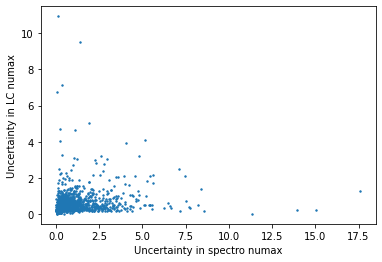

In [32]:
scatters = plt.scatter(jointable['error_numax'], jointable['error_numax_lc'], s=2)
plt.xlabel('Uncertainty in spectro numax')
plt.ylabel('Uncertainty in LC numax')

In [56]:
def errplot(numax1, err1, idstrnumax1, numax2, err2, idstrnumax2):
    overlap = ((numax1 != fillvalue) & (numax2 != fillvalue))
    errs = np.sqrt(err1[overlap] ** 2 + err2[overlap] ** 2)
    diffs = np.abs(numax1[overlap] - numax2[overlap])
    print('Median sigma difference', np.median(diffs / errs))
    scatters = plt.scatter(numax1, numax2, s=2, c=diffs / errs)
    plt.xlabel(idstrnumax1)
    plt.ylabel(idstrnumax2)
    colorbar(scatters)

def sigmaplot(star, numax1, err1, idstrnumax1, numax2, err2, idstrnumax2):
    overlap = ((numax1 != fillvalue) & (numax2 != fillvalue))
    print(f'Overlap of {np.sum(overlap)} stars')
    print(f'In 1 there are {np.sum(numax1 != fillvalue)} stars')
    print(f'In 2 there are {np.sum(numax2 != fillvalue)} stars')
    errs = np.sqrt(err1[overlap] ** 2 + err2[overlap] ** 2)
    diffs = np.abs(numax1[overlap] - numax2[overlap])
    print('Median sigma difference', np.median(diffs / errs))
    plt.figure()
    plt.scatter(np.arange(len(star[overlap])), diffs / errs, s=2)
    plt.xlabel('Star')
    plt.ylabel(r'abs(numax1 - numax2) / (sqrt(error_numax1$^2$ + error_numax2$^2$))')
    plt.yscale('log')
    
    plt.figure()
    plt.scatter(np.arange(len(star[overlap])), diffs / errs, s=2)
    plt.xlabel('Star')
    plt.ylabel(r'abs(numax1 - numax2) / (sqrt(error_numax1$^2$ + error_numax2$^2$))')

Median sigma difference 0.09287638641907235


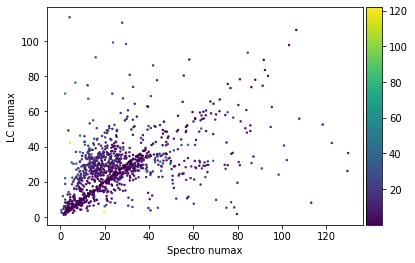

In [50]:
errplot(jointable['numax'], jointable['error_numax'], 'Spectro numax',
        jointable['numax_lc'], jointable['error_numax_lc'], 'LC numax')

Overlap of 1149 stars
In 1 there are 1607 stars
In 2 there are 2032 stars
Median sigma difference 0.09287638641907235


<IPython.core.display.Javascript object>


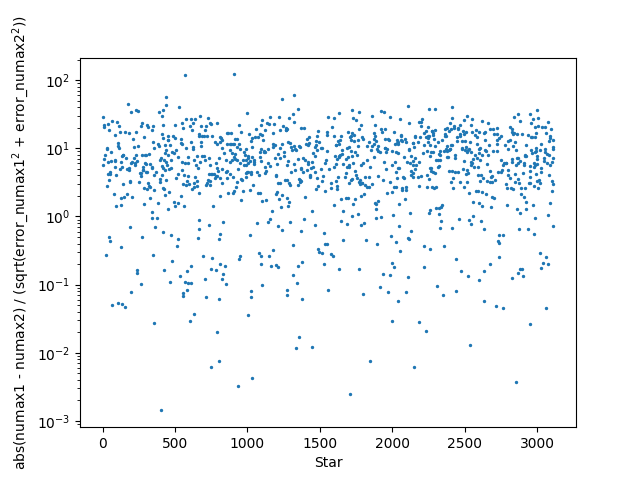

<IPython.core.display.Javascript object>


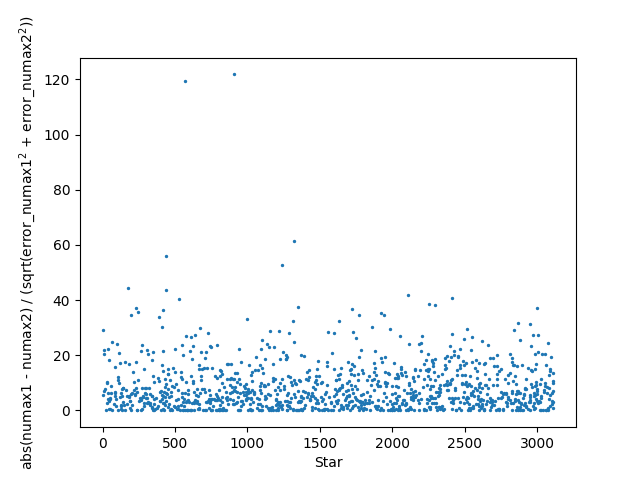

In [63]:
sigmaplot(
    jointable['star'],
    jointable['numax'], jointable['error_numax'], 'Spectro numax',
    jointable['numax_lc'], jointable['error_numax_lc'], 'LC numax')

Overlap of 909 stars
In 1 there are 1607 stars
In 2 there are 1618 stars
Median sigma difference 0.08768239221052018


/home/amalie/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<IPython.core.display.Javascript object>


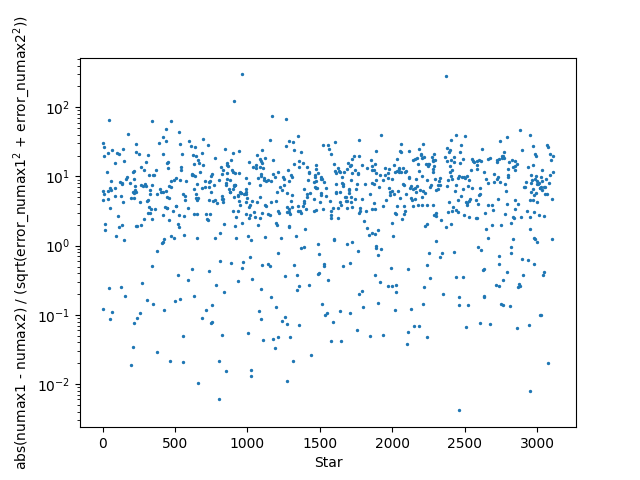

<IPython.core.display.Javascript object>


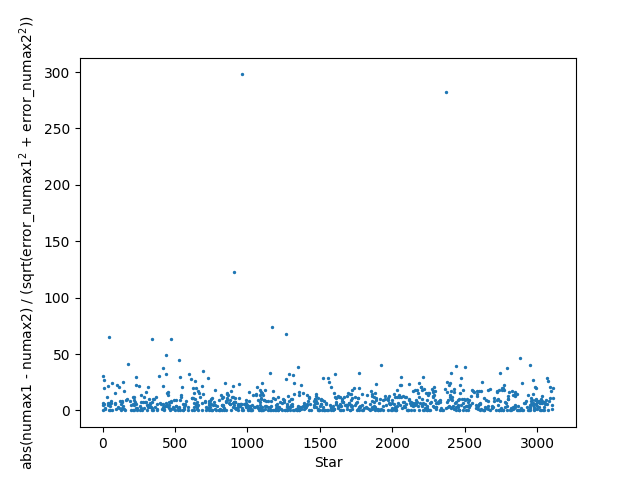

In [62]:
sigmaplot(
    jointable['star'],
    jointable['numax'], jointable['error_numax'], 'Spectro numax',
    jointable['numax_psd'], jointable['error_numax_psd'], 'PSD numax')

Overlap of 1042 stars
In 1 there are 1618 stars
In 2 there are 2032 stars
Median sigma difference 0.021756881657208994


<IPython.core.display.Javascript object>


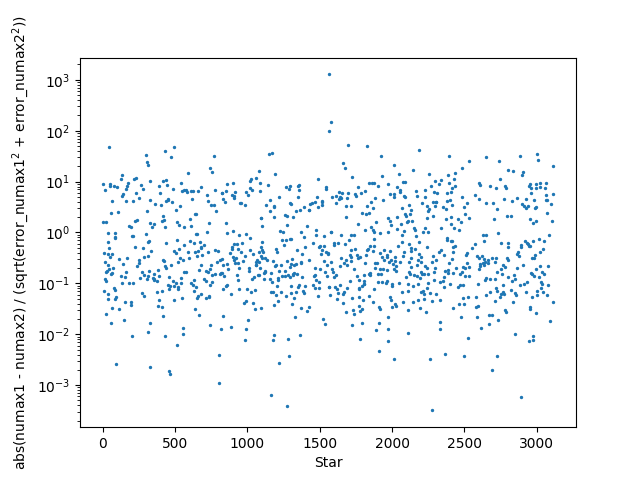

<IPython.core.display.Javascript object>


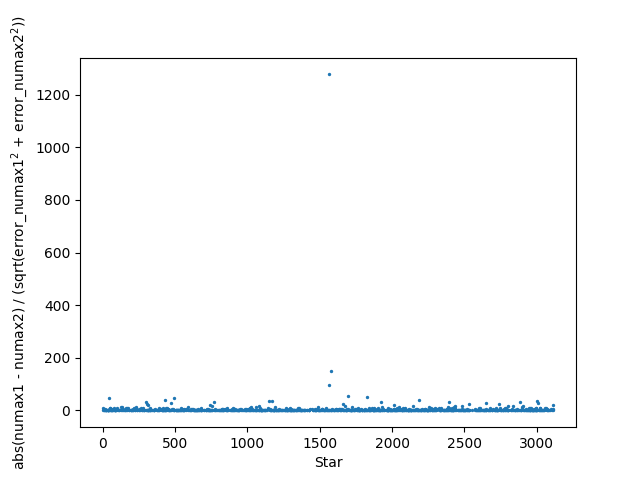

In [61]:
sigmaplot(
    jointable['star'],
    jointable['numax_psd'], jointable['error_numax_psd'], 'PSD numax',
    jointable['numax_lc'], jointable['error_numax_lc'], 'LC numax')

# Compare log, get sample of stars that could have signal deleted by psd process, start run for all star